### Imports

In [4]:
import sys
sys.version

'3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data from cleaned csv with labels and integer values

In [6]:
pvp_data = pd.read_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/pvp_clean_w_labels.csv')

In [7]:
# Drop rows that didn't complete any of Case 1-6
pvp_data = pvp_data[pvp_data['case1_q3'].notna() | pvp_data['case2_q6'].notna() 
                   | pvp_data['case3_q8'].notna() | pvp_data['case4_q11'].notna() |
                   pvp_data['case5_q14'].notna() | pvp_data['case6_q17'].notna()]

### Make dataframe for Table 1 called "part_chars"

In [8]:
# Make new df for Table 1 and insert id column from original df
part_chars = pvp_data.loc[:, "role":"where"]
part_chars['id'] = pvp_data.id

# Move the column to head of list using index, pop and insert
cols = list(part_chars)
cols.insert(0, cols.pop(cols.index('id')))

# Use ix to reorder
part_chars = part_chars.loc[:, cols]

# Replace NaNs with 'missing'
part_chars = part_chars.fillna('missing')

In [9]:
# Total N
total = len(part_chars)
print(f'N = {total}')

N = 550


In [10]:
# Generate gender breakdown

# Count occurrence of each value in 'gender' column
counts = part_chars.gender.value_counts()

# Count occurrence of each value in 'gender' column as percentage of total 
percs = part_chars.gender.value_counts(normalize=True)*100

# Concatenate results into one DataFrame
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Male,261,47.454545
Female,192,34.909091
missing,83,15.090909
Prefer not to answer,13,2.363636
Non-binary,1,0.181818


In [11]:
# Generate Years in Practice Breakdown
counts = part_chars.experience.value_counts()
percs = part_chars.experience.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
15+,173,31.454545
1-5 years,114,20.727273
missing,85,15.454545
6-10 years,73,13.272727
11-15 years,54,9.818182
training,51,9.272727


In [12]:
# Generate Clinical Role Breakdown
counts = part_chars.role.value_counts()
percs = part_chars.role.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Physician,337,61.272727
APP,101,18.363636
missing,80,14.545455
Other,32,5.818182


In [13]:
# Generate Clinical Environment Breakdown
counts = part_chars.practype.value_counts()
percs = part_chars.practype.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Academic,294,53.454545
Other,91,16.545455
Private practice,83,15.090909
missing,82,14.909091


### Specialty Modification

In [14]:
# Old Specialty Breakdown
pd.concat([part_chars['specialty'].str.split(',').explode().value_counts(),
                 pd.Series([part_chars['specialty'].str.contains(',').sum()], index=[7])])

1          369
missing     81
3           73
2           63
5           60
6           49
4           35
7          160
dtype: int64

In [15]:
part_chars['spec_area'] = part_chars['specialty'].replace({
'1,2' : '2',
'1,3' : '3',
'1,4' : '4',
'1,5' : '5',
'1,6' : '6',
'2,6' : '2',
'3,6' : '3',
'1,2,3': '3',
'1,2,6' : '2',
'1,3,6' : '3',
'1,2,3' : '3',
'1,2,4' : '4',
'1,2,4,6' : '4',
'1,2,5' : '5'
})

In [16]:
# Generate Specialty Area Breakdown
counts = part_chars.spec_area.value_counts()
percs = part_chars.spec_area.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
1,211,38.363636
missing,81,14.727273
3,73,13.272727
5,60,10.909091
2,53,9.636364
6,37,6.727273
4,35,6.363636


In [17]:
# Generate cc_train variable
part_chars['cctrain'] = np.where(part_chars['specialty'] == 'missing', 'missing',
          np.where((part_chars['specialty'] == 1) | part_chars['specialty'].str.contains('1'), 1, 0))

In [18]:
# Generate Critical Care Training Breakdown
counts = part_chars.cctrain.value_counts()
percs = part_chars.cctrain.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
1,369,67.090909
0,100,18.181818
missing,81,14.727273


In [19]:
# Generate ICU Type Breakdown
counts = part_chars.icutype.value_counts()
percs = part_chars.icutype.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Mixed,221,40.181818
Medical,118,21.454545
Surgical,97,17.636364
missing,84,15.272727
Other,30,5.454545


In [20]:
# Generate ICU Beds Breakdown
counts = part_chars.beds.value_counts()
percs = part_chars.beds.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
11-20,175,31.818182
21-30,144,26.181818
missing,81,14.727273
31-40,62,11.272727
41+,58,10.545455
0-10,30,5.454545


In [21]:
# Generate Region Breakdown
counts = part_chars['where'].value_counts()
percs = part_chars['where'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Northeast,141,25.636364
Midwest,121,22.000000
south,118,21.454545
west,88,16.000000
missing,80,14.545455
outside,2,0.363636


### Table 2

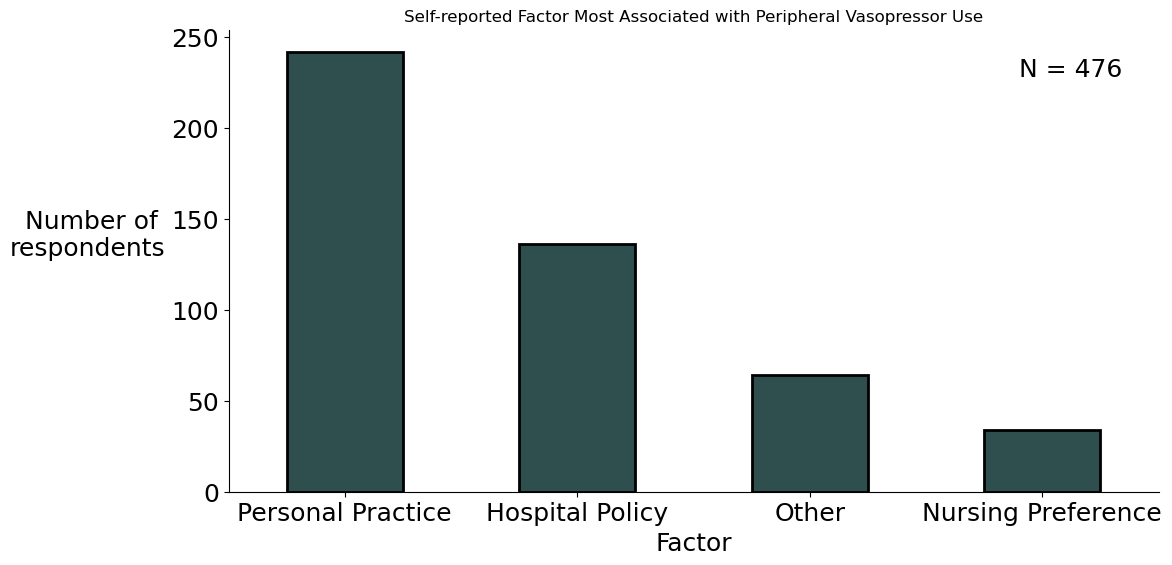

In [22]:
# Generate Practice Policy Breakdown

# Replace NaNs with 'missing'
pvp_data['infl_factors'] = pvp_data['infl_factors'].fillna('missing')

counts = pvp_data['infl_factors'].value_counts()
percs = pvp_data['infl_factors'].value_counts(normalize=True)*100
tbl_2_df = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
tbl_2_df.drop(index = 'missing', inplace = True)
tbl_2_df.reset_index(inplace = True)#.rename({'index': 'factor'})
tbl_2_df.rename(columns={'index': 'factor'}, inplace = True)

ax = tbl_2_df[['factor', 'count']].plot.bar(rot=0, figsize=(12,6), color = 'darkslategray', edgecolor = 'black', linewidth = 2, legend = False)

ax.set_xticklabels(['Personal Practice', 'Hospital Policy', 'Other', 'Nursing Preference'], fontsize = 18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Number of \nrespondents', fontsize = 18)
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel('Factor', fontsize = 18)
ax.set_title('Self-reported Factor Most Associated with Peripheral Vasopressor Use')
ax.annotate("N = 476", xy=(0.85,0.9),xycoords='axes fraction',
             fontsize=18)
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("self_reports.jpg", bbox_inches = 'tight')

### Table 3

In [23]:
# Generate Realism Breakdown

# Replace NaNs with 'missing'
pvp_data['realism'] = pvp_data['realism'].fillna('missing')

counts = pvp_data['realism'].value_counts()
percs = pvp_data['realism'].value_counts(normalize=True)*100
tbl_3_df = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
tbl_3_df.drop(index = 'missing', inplace = True)
tbl_3_df.reset_index(inplace = True)#.rename({'index': 'factor'})
tbl_3_df.rename(columns={'index': 'realism'}, inplace = True)
tbl_3_df = tbl_3_df[['realism', 'count']]
tbl_3_df

,realism,count
0,Very realistic,251
1,Somewhat realistic,204
2,Somewhat unrealistic,20
3,Unrealistic,2


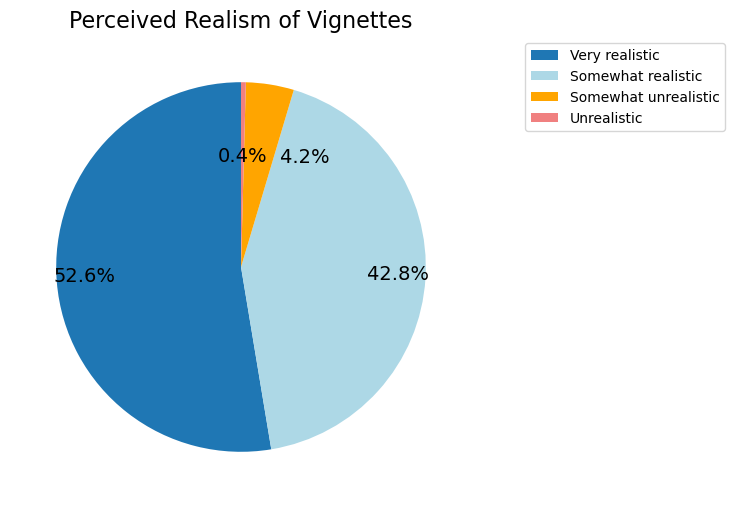

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'realism':['Very realistic', 'Somewhat realistic', 'Somewhat unrealistic', 'Unrealistic'], 'count': [251, 204, 20, 2]})

colors = ['tab:blue', 'lightblue', 'orange', 'lightcoral']

fig, ax = plt.subplots(figsize=(6, 6))

_, _, autotexts = ax.pie(df['count'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

ax.legend(df['realism'], bbox_to_anchor=(1.1, 1))

# Adjusting label positions
for i, text in enumerate(autotexts):
    angle = ax.patches[i].theta2 - ax.patches[i].theta1
    if angle > 7:
        x, y = text.get_position()
        if x < 0:
            x -= 0.25
        else:
            x += 0.25
        text.set_position((x, y))

plt.title('Perceived Realism of Vignettes', fontsize=16)

plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')

plt.show()


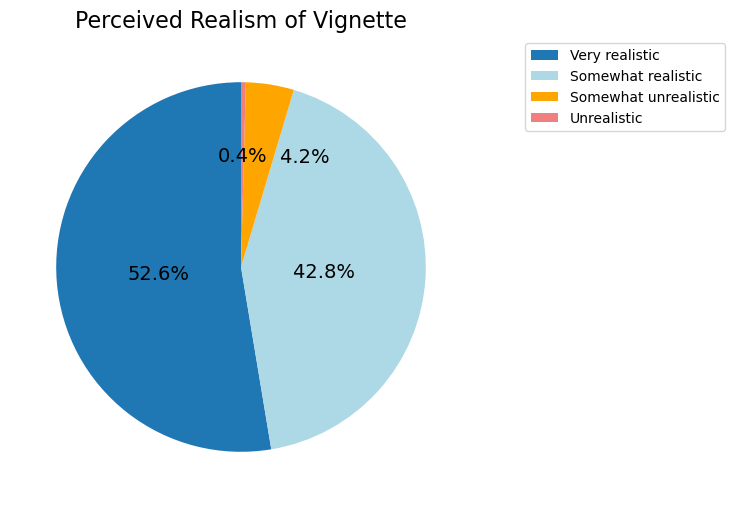

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'realism':['Very realistic', 'Somewhat realistic', 'Somewhat unrealistic', 'Unrealistic'], 'count': [251, 204, 20, 2]})

colors = ['tab:blue', 'lightblue', 'orange', 'lightcoral']

fig, ax = plt.subplots(figsize=(6, 6))

wedges, _, autotexts = ax.pie(df['count'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

ax.legend(df['realism'], loc='upper left', bbox_to_anchor=(1.1, 1))

# Adjusting label positions
for i, text in enumerate(autotexts):
    angle = ax.patches[i].theta2 - ax.patches[i].theta1
    if angle > 7:
        x, y = text.get_position()
        if df['count'][i] > 100:
            text.set_position((0.75*x, 0.75*y))
        else:
            if x < 0:
                x -= 0.25
            else:
                x += 0.25
            text.set_position((x, y))

plt.title('Perceived Realism of Vignette', fontsize=16)

plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')

plt.show()


### Plots for Figure 1

Question: The dataframe subsetted by gender input contains a few missing values for some fields. Is this okay?

### Usual Fluid

In [26]:
plt.rcParams.update({'font.size': 15})

In [27]:
print(f"N = {len(pvp_data['usual_fluid'].dropna())}")

N = 471


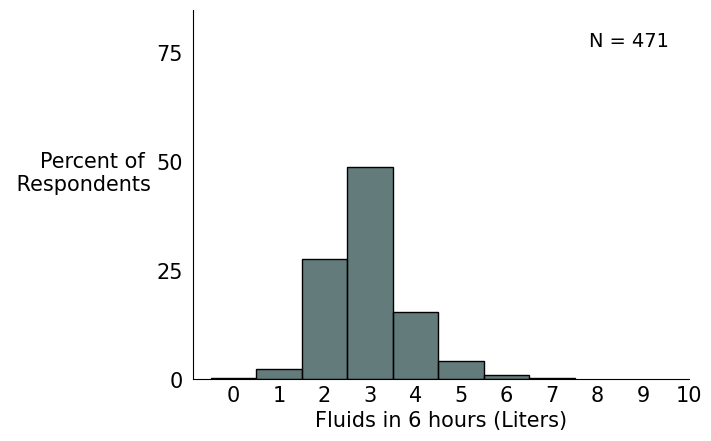

In [28]:
# Plotting Fluids in 6 hours

# title_format = dict(
#     fontsize=18,
#     pad=12,
#     color='black',
#     fontname='DejaVu Sans'
# )
hfont = {'fontname':'DejaVu Sans'}

ax = sns.histplot(
    data=pvp_data,
    x='usual_fluid',
    discrete=True,
    stat='percent',
    color = 'darkslategray'
)
ax.set(xlabel='Fluids in 6 hours (Liters)', ylabel='Percent of \n Respondents', 
       ylim = [0,85])
ax.set_xticks(np.arange(0,11,1))
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.tick_params(left = False, bottom = False)
ax.tick_params(axis='x', which='major', pad=1)
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(f"N = {len(pvp_data['usual_fluid'])}")
ax.annotate("N = 471", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))

plt.savefig('usual_fluid.jpg', bbox_inches = 'tight', dpi = 300)
#print(path + 'usual_fluid.jpg')

### MAP Goal

In [29]:
print(f"N = {len(pvp_data['usual_map'].dropna())}")

N = 472


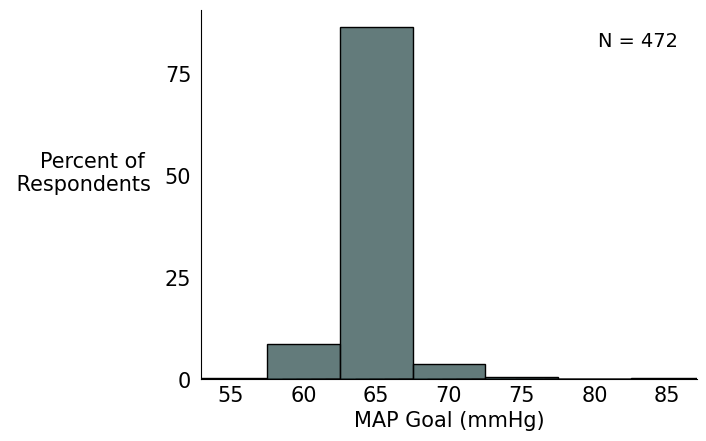

In [30]:
# Plotting MAP Goal
import pylab as plt
import seaborn as sns

tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

ax = sns.histplot(
    data=pvp_data,
    x='usual_map',
    discrete=True,
    stat = 'percent',
    #shrink = 0.98,
    color = 'darkslategray'
)
ax.set(xlabel='MAP Goal (mmHg)', ylabel='Percent of \n Respondents')
       #yscale = 'log')
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_tick_params(which='minor', width=0) 
ax.annotate("N = 472", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 4.99)
plt.savefig("usual_map.jpg", bbox_inches = 'tight', dpi = 300)
plt.show()
#ax.bar(6,width = 5)

### Vasopressor Timing

In [31]:
print(f"N = {len(pvp_data['usual_vp'].dropna())}")

N = 474


C:\Users\julienw\AppData\Local\Temp\ipykernel_13544\1429541226.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Before Giving Fluid', 'While Giving Fluid', 'After Giving Fluid'], fontsize = 13)


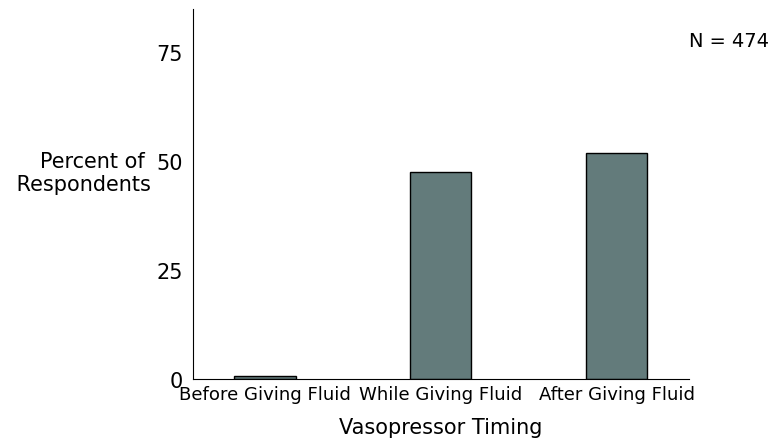

In [32]:
# Plotting Vasopressor Timing
pvp_data['usual_vp'] = pd.Categorical(pvp_data['usual_vp'],
                                   categories=['Before giving fluid', 'while giving fluid', 'After giving fluid'],
                                   ordered=True
                                  )
ax = sns.histplot(
    data=pvp_data,
    x='usual_vp',
    discrete=True,
    shrink = 0.35,
    stat='percent',
    color = 'darkslategray',
)
ax.set(xlabel='Vasopressor Timing', ylabel='Percent of \n Respondents', 
       ylim = [0,85])
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['Before Giving Fluid', 'While Giving Fluid', 'After Giving Fluid'], fontsize = 13)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.annotate("N = 474", xy=(1.0,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.tick_params(axis='x', which='major', pad=1)
ax.margins(x=0.1)
plt.savefig("usual_vp.jpg", bbox_inches = 'tight', dpi = 300)

In [33]:
print(f"N = {len(pvp_data['usual_cl'].dropna())}")

N = 470


C:\Users\julienw\AppData\Local\Temp\ipykernel_13544\95672192.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fontsize = 13)


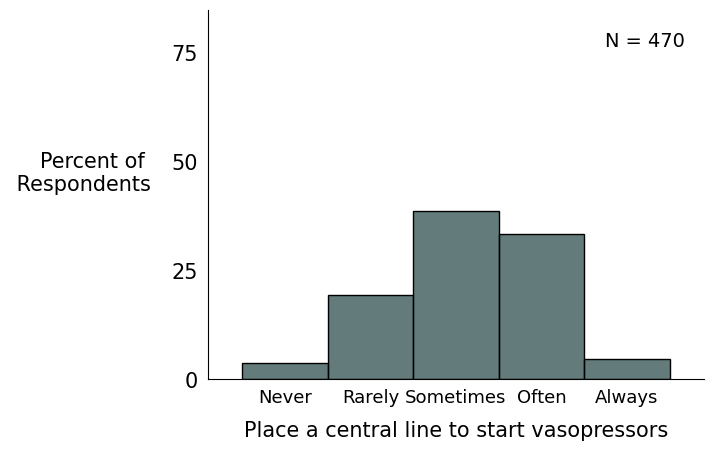

In [34]:
# Plotting Route of VP administration
pvp_data.usual_cl = pd.Categorical(pvp_data.usual_cl,
                                   categories=['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
                                   ordered=True
                                  )
ax = sns.histplot(
    data=pvp_data,
    x='usual_cl',
    discrete=True,
    #shrink = 1.0,
    stat='percent',
    color = 'darkslategray',
)
ax.set(xlabel='Place a central line to start vasopressors', ylabel='Percent of \n Respondents', ylim = [0,85])
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 15)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fontsize = 13)
ax.tick_params(left = False, bottom = False)
ax.annotate("N = 470", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
ax.margins(x = 0.08)
plt.savefig("usual_cl.jpg", bbox_inches = 'tight', dpi = 300)

### Figure 3

In [35]:
fig_3a = pvp_data[['route1_q3','route3_q8','route5_q14']].copy(deep = True)
fig_3a = pd.Series(fig_3a.stack().values) 

In [36]:
len(fig_3a.dropna())

1127

C:\Users\julienw\AppData\Local\Temp\ipykernel_13544\1433467438.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)


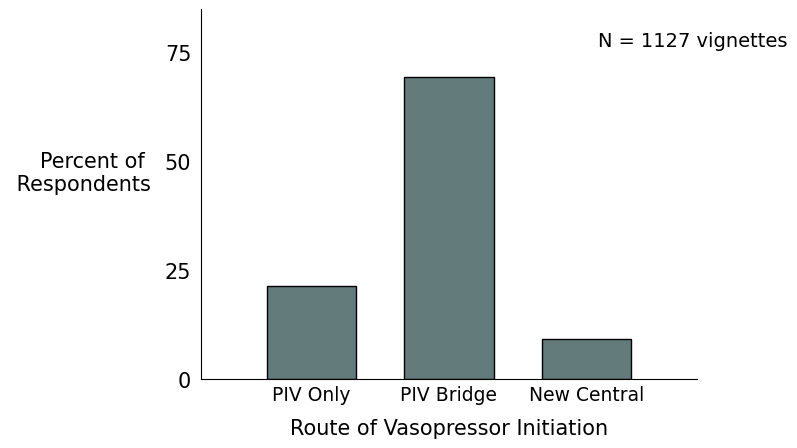

In [37]:
fig_3a = pd.Categorical(fig_3a,
                               categories=['PIV Only', 'PIV bridge', 'Central Only'],
                               ordered=True
                       )
fig_3a
ax = sns.histplot(
    data=fig_3a,
    stat = 'percent',
    shrink = 0.65,
    color = 'darkslategray'
)
ax.set(xlabel='Route of Vasopressor Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 1127 vignettes", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
ax.margins(x = 0.18)
plt.savefig("fig_3a.jpg", bbox_inches = 'tight', dpi = 300)

In [74]:
fig_3a.value_counts()

PIV Only        241
PIV bridge      782
Central Only    104
dtype: int64

In [38]:
fig_3b = pvp_data['route6_q17']
print(len(fig_3b.dropna()))

367


C:\Users\julienw\AppData\Local\Temp\ipykernel_13544\2004822511.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PICC', 'PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)


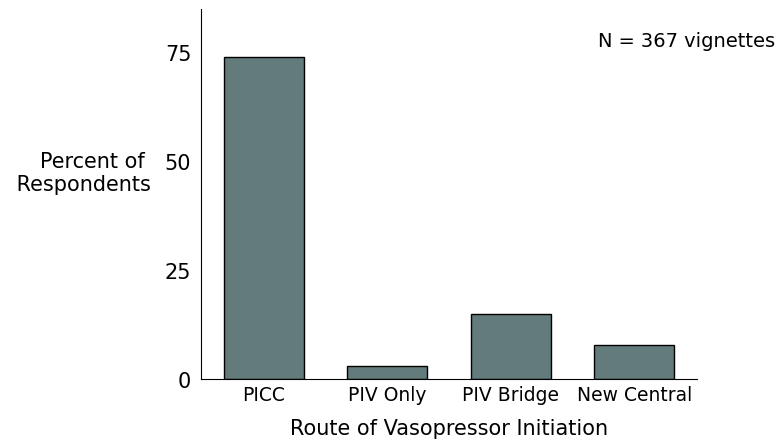

In [39]:
fig_3b = pd.Categorical(fig_3b,
                               categories=['PICC', 'PIV Only', 'PIV bridge', 'Central only'],
                               ordered=True
                       )
#fig_3a
ax = sns.histplot(
    data=fig_3b,
    stat = 'percent',
    shrink = 0.65,
    color = 'darkslategray'
)
ax.set(xlabel='Route of Vasopressor Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PICC', 'PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 367 vignettes", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("fig_3b.jpg", bbox_inches = 'tight', dpi = 300)
#ax.margins(x = 0.18)

In [75]:
fig_3b.value_counts()

PICC            272
PIV Only         11
PIV bridge       55
Central only     29
dtype: int64

In [40]:
fig_3c = pvp_data['route4_q11']
len(fig_3c.dropna())

390

C:\Users\julienw\AppData\Local\Temp\ipykernel_13544\2870736483.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PORT', 'PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)


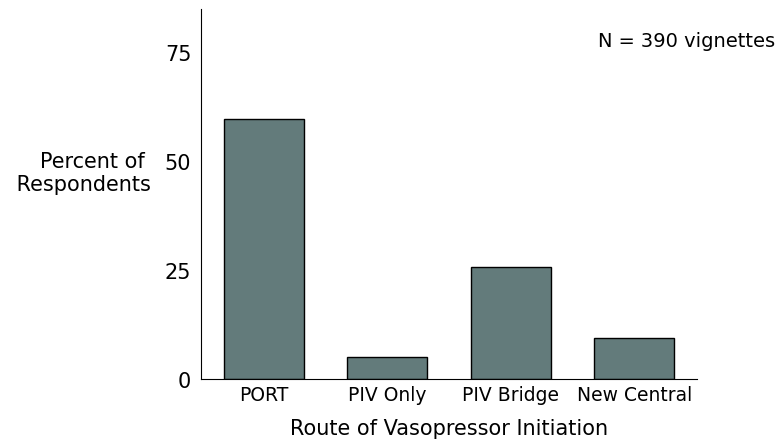

In [41]:
fig_3c = pd.Categorical(fig_3c,
                               categories=['PORT', 'PIV Only', 'PIV bridge', 'Central only'],
                               ordered=True
                       )
#fig_3a
ax = sns.histplot(
    data=fig_3c,
    stat = 'percent',
    shrink = 0.65,
    color = 'darkslategray'
)
ax.set(xlabel='Route of Vasopressor Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PORT', 'PIV Only', 'PIV Bridge', 'New Central'], fontsize = 13.5)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 390 vignettes", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("fig_3c.jpg", bbox_inches = 'tight', dpi = 300)
#ax.margins(x = 0.18)

In [76]:
fig_3c.value_counts()

PORT            233
PIV Only         20
PIV bridge      100
Central only     37
dtype: int64

### Suppl. Table 3

In [42]:
pvp_data['case7_q21'] = pvp_data['case7_q21'].fillna('missing')
counts = pvp_data['case7_q21'].value_counts()
percs = pvp_data['case7_q21'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,240,43.636364
PIV to central,146,26.545455
missing,63,11.454545
PIV continue,61,11.090909
Alternative access,40,7.272727


In [43]:
pvp_data['case8_q24'] = pvp_data['case8_q24'].fillna('missing')
counts = pvp_data['case8_q24'].value_counts()
percs = pvp_data['case8_q24'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,225,40.909091
PIV to central,169,30.727273
missing,67,12.181818
PIV continue,50,9.090909
Alternative access,39,7.090909


In [44]:
pvp_data['case9_q27'] = pvp_data['case9_q27'].fillna('missing')
counts = pvp_data['case9_q27'].value_counts()
percs = pvp_data['case9_q27'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,223,40.545455
PIV to central,156,28.363636
missing,67,12.181818
PIV continue,65,11.818182
Alternative access,39,7.090909


In [45]:
pvp_data['case10_q30'] = pvp_data['case10_q30'].fillna('missing')
counts = pvp_data['case10_q30'].value_counts()
percs = pvp_data['case10_q30'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,246,44.727273
PIV to central,151,27.454545
missing,67,12.181818
PIV continue,51,9.272727
Alternative access,35,6.363636


### Figure 4

In [46]:
pvp_clean = pd.read_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/pvp_clean_fixed.csv')
pvp_clean =  pvp_clean[pvp_clean['case1_q3'].notna() | pvp_clean['case2_q6'].notna() 
                   | pvp_clean['case3_q8'].notna() | pvp_clean['case4_q11'].notna() |
                   pvp_clean['case5_q14'].notna() | pvp_clean['case6_q17'].notna()].reset_index(drop = True)

In [47]:
# Create new fluid variables derived from recommended treatment variable
# np.where(condition, value if condition is true, value if condition is false)
pvp_clean['fluid 1'] = np.where(pvp_clean['case1_q3'].isna(), np.nan,
                                np.where((pvp_clean['case1_q3'] == 1) | (pvp_clean['case1_q3'] == 2), 1, 0))
pvp_clean['fluid 2'] = np.where(pvp_clean['case2_q6'].isna(), np.nan,
                                np.where((pvp_clean['case2_q6'] == 1) | (pvp_clean['case2_q6'] == 2), 1, 0))
pvp_clean['fluid 3'] = np.where(pvp_clean['case3_q8'].isna(), np.nan,
                                np.where((pvp_clean['case3_q8'] == 1) | (pvp_clean['case3_q8'] == 2), 1, 0))
pvp_clean['fluid 4'] = np.where(pvp_clean['case4_q11'].isna(), np.nan,
                                np.where((pvp_clean['case4_q11'] == 1) | (pvp_clean['case4_q11'] == 2), 1, 0))
pvp_clean['fluid 5'] = np.where(pvp_clean['case5_q14'].isna(), np.nan,
                                np.where((pvp_clean['case5_q14'] == 1) | (pvp_clean['case5_q14'] == 2), 1, 0))
pvp_clean['fluid 6'] = np.where(pvp_clean['case6_q17'].isna(), np.nan,
                                np.where((pvp_clean['case6_q17'] == 1) | (pvp_clean['case6_q17'] == 2), 1, 0))

In [48]:
fluids = pvp_clean[['fluid 1', 'fluid 2', 'fluid 3', 'fluid 4', 'fluid 5', 'fluid 6']]

In [72]:
fluids.sum(axis=1).value_counts(normalize=True).mul(100)

3.0    26.000000
4.0    22.000000
2.0    19.272727
1.0    14.000000
5.0    12.181818
6.0     4.000000
0.0     2.545455
dtype: float64

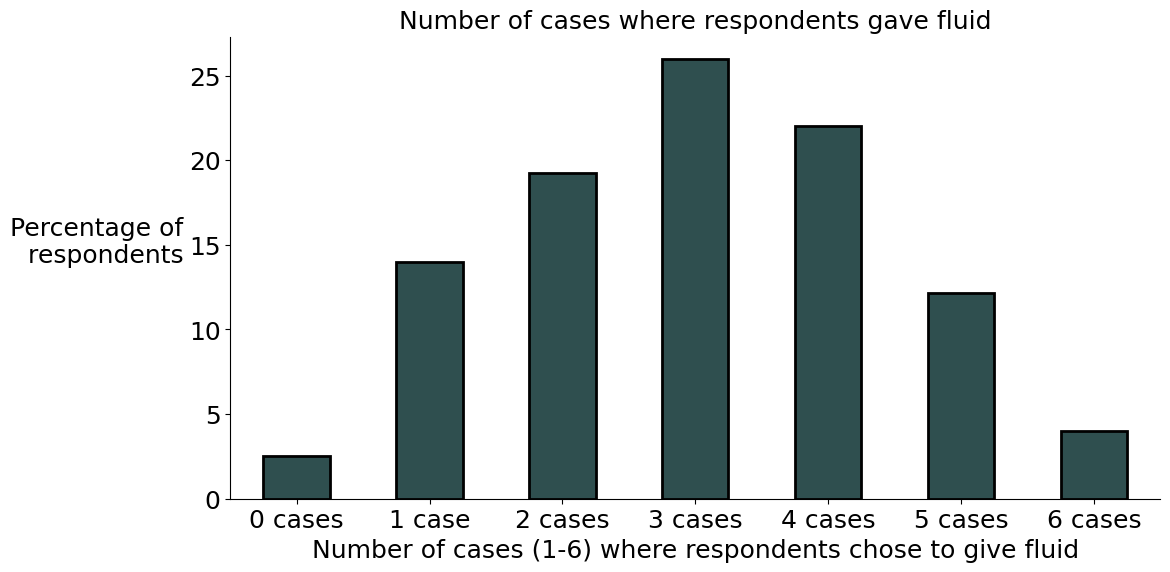

In [49]:
ax = fluids.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6), color = 'darkslategray', edgecolor = 'black', linewidth = 2)
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases', '5 cases', '6 cases'], fontsize = 18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Percentage of\n respondents', fontsize = 18)
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel('Number of cases (1-6) where respondents chose to give fluid', fontsize = 18)
ax.set_title('Number of cases where respondents gave fluid')
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("gave_fluid.jpg", bbox_inches = 'tight', dpi = 300)
#ax.tick_params(axis='x', which='major', pad=10)

In [50]:
# Create pressors variables derived from recommended treatment variable
pvp_clean['pressor 1'] = np.where(pvp_clean['case1_q3'].isna(), np.nan,
                                  np.where((pvp_clean['case1_q3'] == 2) | (pvp_clean['case1_q3'] == 3), 1, 0))
pvp_clean['pressor 2'] = np.where(pvp_clean['case2_q6'].isna(), np.nan,
                                  np.where((pvp_clean['case2_q6'] == 2) | (pvp_clean['case2_q6'] == 3), 1, 0))
pvp_clean['pressor 3'] = np.where(pvp_clean['case3_q8'].isna(), np.nan,
                                  np.where((pvp_clean['case3_q8'] == 2) | (pvp_clean['case3_q8'] == 3), 1, 0))
pvp_clean['pressor 4'] = np.where(pvp_clean['case4_q11'].isna(), np.nan,
                                  np.where((pvp_clean['case4_q11'] == 2) | (pvp_clean['case4_q11'] == 3), 1, 0))
pvp_clean['pressor 5'] = np.where(pvp_clean['case5_q14'].isna(), np.nan,
                                  np.where((pvp_clean['case5_q14'] == 2) | (pvp_clean['case5_q14'] == 3), 1, 0))
pvp_clean['pressor 6'] = np.where(pvp_clean['case6_q17'].isna(), np.nan,
                                  np.where((pvp_clean['case6_q17'] == 2) | (pvp_clean['case6_q17'] == 3), 1, 0))

In [51]:
pressors = pvp_clean[['pressor 1', 'pressor 2', 'pressor 3', 'pressor 4', 'pressor 5', 'pressor 6']]

In [71]:
pressors.sum(axis=1).value_counts(normalize=True).mul(100)

5.0    26.545455
6.0    24.363636
4.0    22.727273
3.0    14.727273
2.0     5.818182
1.0     4.181818
0.0     1.636364
dtype: float64

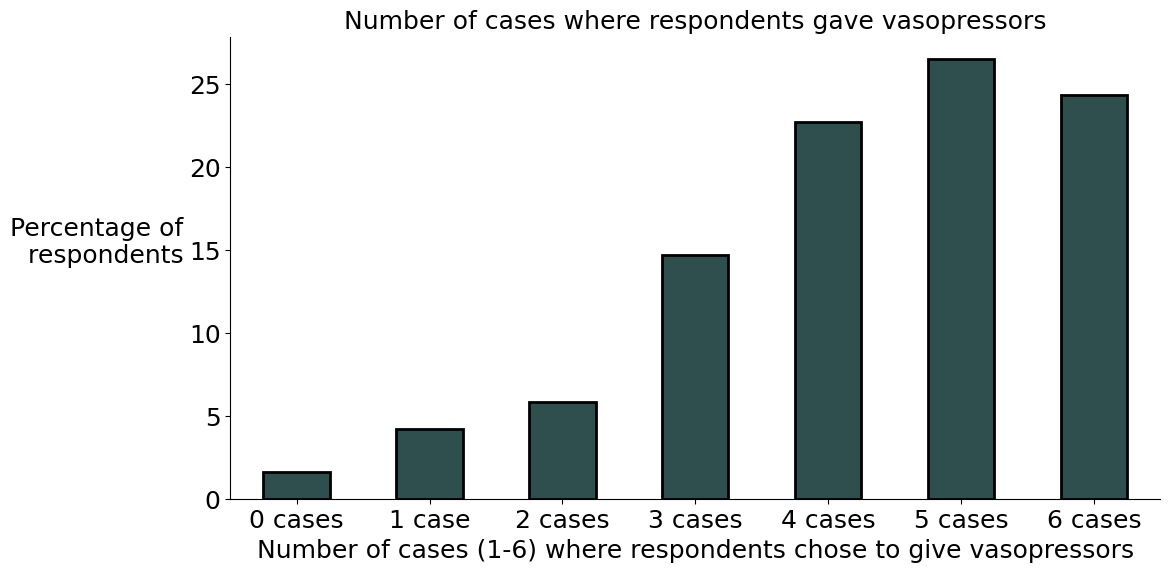

In [52]:
ax = pressors.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6), color = 'darkslategray', edgecolor = 'black', linewidth = 2)
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases', '5 cases', '6 cases'], fontsize = 18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Percentage of\n respondents', fontsize = 18)
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel('Number of cases (1-6) where respondents chose to give vasopressors', fontsize = 18)
ax.set_title('Number of cases where respondents gave vasopressors')
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("gave_pressors.jpg", bbox_inches = 'tight')
#ax.tick_params(axis='x', which='major', pad=10)

In [53]:
# Create cvc variable derived from continuation route
pvp_clean['cvc 7'] = np.where(pvp_clean['case7_q21'].isna(), np.nan,
                              np.where((pvp_clean['case7_q21'] == 3) | ((pvp_clean['case7_q21'] == 4)
                                 & (pvp_clean['altacc7_q21'] == 3)), 1, 0))
pvp_clean['cvc 8'] = np.where(pvp_clean['case8_q24'].isna(), np.nan,
                              np.where((pvp_clean['case8_q24'] == 3) | ((pvp_clean['case8_q24'] == 4)
                                 & (pvp_clean['altacc8_q24'] == 3)), 1, 0))
pvp_clean['cvc 9'] = np.where(pvp_clean['case9_q27'].isna(), np.nan,
                              np.where((pvp_clean['case9_q27'] == 3) | ((pvp_clean['case9_q27'] == 4)
                                 & (pvp_clean['altacc9_q27'] == 3)), 1, 0))
pvp_clean['cvc 10'] = np.where(pvp_clean['case10_q30'].isna(), np.nan,
                              np.where((pvp_clean['case10_q30'] == 3) | ((pvp_clean['case10_q30'] == 4)
                                 & (pvp_clean['altacc10_q30'] == 3)), 1, 0))

In [54]:
cvc = pvp_clean[['cvc 7', 'cvc 8', 'cvc 9', 'cvc 10']]

In [79]:
cvc.sum(axis=1).value_counts(normalize=True)

2.0    0.234545
3.0    0.230909
1.0    0.210909
0.0    0.196364
4.0    0.127273
dtype: float64

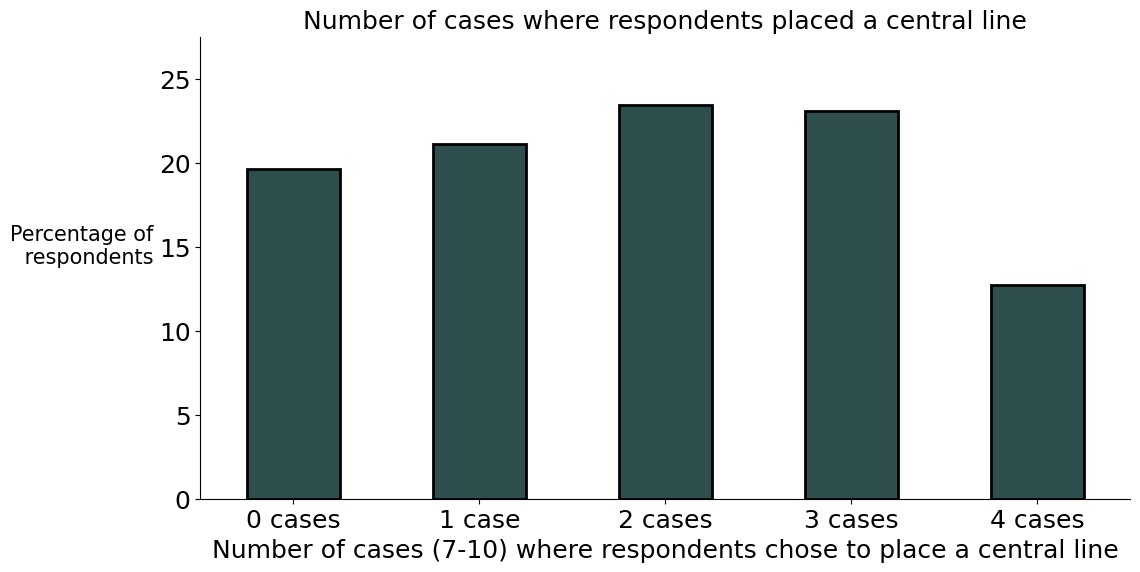

In [55]:
ax = cvc.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6), color = 'darkslategray', edgecolor = 'black', linewidth = 2)
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set(ylim = [0,27.5])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases'], fontsize = 18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Percentage of\n respondents')
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel('Number of cases (7-10) where respondents chose to place a central line', fontsize = 18)
ax.set_title('Number of cases where respondents placed a central line', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("placed_cl.jpg", bbox_inches = 'tight')
#ax.tick_params(axis='x', which='major', pad=10)

### Suppl. Table 1

In [81]:
# Define the possible values for each column
gender_values = [1, 2]
role_values = [1, 2, 3]
region_values = [1, 2, 3, 4, 5]
survey_values = [1, 0]

# Define the number of occurrences for each value in each column
gender_counts_survey = [261, 192]
role_counts_survey = [337, 101, 32]
region_counts_survey = [141, 121, 118, 88, 2]
survey_counts_survey = [550, 0]

gender_counts_sccm = [3354, 2167]
role_counts_sccm = [8804, 2392, 6]
region_counts_sccm = [2823, 2601, 3397, 1867, 54]
survey_counts_sccm = [0, 11202]

# Generate the arrays of repeated values for each column
gender_survey = np.repeat(gender_values, gender_counts_survey)
role_survey = np.repeat(role_values, role_counts_survey)
region_survey = np.repeat(region_values, region_counts_survey)
survey_survey = np.repeat(survey_values, survey_counts_survey)

gender_sccm = np.repeat(gender_values, gender_counts_sccm)
role_sccm = np.repeat(role_values, role_counts_sccm)
region_sccm = np.repeat(region_values, region_counts_sccm)
survey_sccm = np.repeat(survey_values, survey_counts_sccm)

# Combine the arrays into Pandas dataframes
df_survey = pd.concat([pd.Series(gender_survey), pd.Series(role_survey), 
                       pd.Series(region_survey), pd.Series(survey_survey)], axis=1)
df_survey.columns = ['Gender', 'Role', 'Region', 'Survey']

df_sccm = pd.concat([pd.Series(gender_sccm), pd.Series(role_sccm), 
                     pd.Series(region_sccm), pd.Series(survey_sccm)], axis=1)
df_sccm.columns = ['Gender', 'Role', 'Region', 'Survey']

# Concatenate survey and SCCM data
frames = [df_survey, df_sccm]
supp_table_1 = pd.concat(frames)
# Convert data set to csv and export to working directory
supp_table_1.to_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/supp_table_1.csv',index = False)

In [80]:
supp_table_1

,Gender,Role,Region,Survey
0,1,1.0,1,1
1,1,1.0,1,1
2,1,1.0,1,1
3,1,1.0,1,1
4,1,1.0,1,1
...,...,...,...,...
11197,3,3.0,6,0
11198,3,3.0,6,0
11199,3,3.0,6,0
11200,3,3.0,6,0


### Table 4

In [57]:
comments = pvp_data[['case1_comment', 'case2_comment', 'case3_comment', 'case4_comment', 'case5_comment',
                     'case6_comment', 'case7_comment', 'case8_comment', 'case9_comment', 'case10_comment', 
                     'realism_comment', 'infl_factors_other', 'usual_comment']]

In [58]:
comments = comments.dropna(how = 'all')

In [59]:
comments.to_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/comments.csv',index = False)

In [62]:
# Generate usual MAP Breakdown
counts = pvp_data.usual_map.value_counts()
percs = pvp_data.usual_map.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
65.0,408,86.440678
60.0,41,8.686441
70.0,18,3.813559
75.0,3,0.635593
85.0,1,0.211864
55.0,1,0.211864


In [63]:
# Generate usual MAP Breakdown
counts = pvp_data.usual_fluid.value_counts()
percs = pvp_data.usual_fluid.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
3.0,230,48.832272
2.0,130,27.600849
4.0,73,15.498938
5.0,20,4.246285
1.0,11,2.335456
6.0,5,1.061571
7.0,1,0.212314
0.0,1,0.212314


In [64]:
# Generate usual VP Breakdown
counts = pvp_data.usual_vp.value_counts()
percs = pvp_data.usual_vp.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
After giving fluid,246,51.898734
while giving fluid,225,47.468354
Before giving fluid,3,0.632911


In [65]:
# Generate usual CL Breakdown
counts = pvp_data.usual_cl.value_counts()
percs = pvp_data.usual_cl.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Sometimes,182,38.723404
Often,157,33.404255
Rarely,91,19.361702
Always,22,4.680851
Never,18,3.829787
